In [625]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [626]:
football_df = pd.read_csv('football.csv')
football_df

,Team,Season2016Wins,Season2017Wins
0,X1,3,5
1,X2,3,4
2,X3,2,8
3,X4,2,3
4,X5,6,2
5,X6,6,4
6,X7,7,3
7,X8,7,4
8,X9,8,5
9,X10,7,6


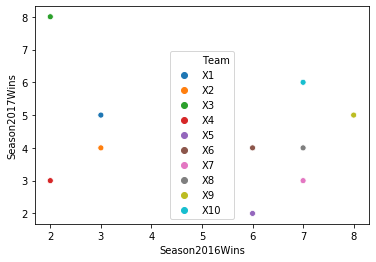

In [627]:
ax = sns.scatterplot(x='Season2016Wins', y="Season2017Wins", data=football_df,hue="Team")

In [628]:
def manhattanDistance(X, p):
    return np.sum(np.abs(X-p), axis=1).reshape(-1, 1)

def euclideanDistance(X, p):
    return np.sum((X-p)**2, axis=1).reshape(-1, 1)

def cosineSimilarity(X, p):
    return 1-normalize(X.reshape(-1, X.shape[1]), axis=1).dot(normalize(p.reshape(-1, 1), axis=0))

def jaccardSimilarity(X, p):
    return (1-np.sum(np.minimum(X,p),axis=1)/np.sum(np.maximum(X,p),axis=1)).reshape(-1,1)

def SSEValue(X, clusters, centroids):
    result = 0
    for i, centroid in enumerate(centroids):
        result += np.sum(euclideanDistance(X[np.where(clusters==i)], centroid))
    return result

In [629]:
def kmeans(X, centroids, k=3, metric=0, maxIter=100):
    np.random.seed(42)
    i = 0
    previousSSEValue = None
    currentSSEValue = None
    previousClusters = None
    
#   calculating Centroids
    if centroids is None:
        centroids = X[np.random.choice(len(X), size=k, replace=False)]
        
    
    centroids = np.asarray(centroids)                       
    
    
    while i < maxIter:
#         distance calculation
        pointToCentroidDistances = []
        for centroid in centroids:
            if(metric==0):
                pointToCentroidDistances.append(manhattanDistance(X, centroid))
            if(metric==1):
                pointToCentroidDistances.append(euclideanDistance(X, centroid))
            if(metric==2):
                pointToCentroidDistances.append(cosineSimilarity(X, centroid))
            if(metric==3):
                pointToCentroidDistances.append(jaccardSimilarity(X, centroid))

        distance = np.concatenate(pointToCentroidDistances, axis=1)
        
        clusters = np.argmin(distance, axis=1)
        
#         sum of square error calculation
        currentSSEValue = SSEValue(X, clusters, centroids)
    
#         new centroid calculation
        newCentroidPoints=[]
        for j in range(len(centroids)):
            if(metric!=0):
                newCentroidPoints.append(np.mean(X[np.where(clusters==j)],axis=0))
            else:
                newCentroidPoints.append(np.median(X[np.where(clusters==j)],axis=0))
        
#         new point to centroid distance calculation
        newPointToCentroidDistances = 0
        for x, y in zip(centroids, newCentroidPoints):
            if(metric==0):
                newPointToCentroidDistances += manhattanDistance(np.array([list(x)]), np.array(list(y)))
            if(metric==1):
                newPointToCentroidDistances += euclideanDistance(np.array([list(x)]), np.array(list(y)))
            if(metric==2):
                newPointToCentroidDistances += cosineSimilarity(np.array([list(x)]), np.array(list(y)))
            if(metric==3):
                newPointToCentroidDistances += jaccardSimilarity(np.array([list(x)]), np.array(list(y)))

        
        print("Iteration {}".format(i))
        print("Current Cluster SSE= {}".format(currentSSEValue))
        print("Previous Cluster SSE= {}".format(previousSSEValue))
        print("----"*20)
        i+=1
        
        if math.isclose(newPointToCentroidDistances, 0, abs_tol=1e-9) or (previousSSEValue is not None and previousSSEValue < currentSSEValue):
            if (previousSSEValue is not None and previousSSEValue < currentSSEValue):
                clusters = previousClusters
            print("-+-"*20)
            print('Number of Iterations= {}'.format(i))
            print('Final Sum of Square Error= {}'.format(previousSSEValue if previousSSEValue < currentSSEValue else currentSSEValue))
            print("-+-"*20)
            return clusters
        
        previousSSEValue = currentSSEValue
        previousClusters = clusters
        centroids = newCentroidPoints



In [630]:
def kmeansWithMultipleMetrics(df, X, centroids, metric=0):
    clusters = kmeans(X, centroids, metric=metric)
    df['clusters'] = clusters
    ax = sns.scatterplot(x='Season2016Wins', y="Season2017Wins", hue='clusters', data=df)

In [631]:
def predictClass(clusters, y, k=3):
    index = []
    for i in range(k):
        index.append(np.where(clusters == i))
    for cluster in index:
        mode = int(stats.mode(y[cluster])[0])
        clusters[cluster] = mode
    return clusters


-----------------------------------------------------------------------------------------------------------------

Que : - Initialize with two centroids, (4, 6) and (5, 4). Use Manhattan distance as the distance metric. Please use K-Means to find two clusters.

Iteration 0
Current Cluster SSE= 58
Previous Cluster SSE= None
--------------------------------------------------------------------------------
Iteration 1
Current Cluster SSE= 37.0
Previous Cluster SSE= 58
--------------------------------------------------------------------------------
Iteration 2
Current Cluster SSE= 29.0
Previous Cluster SSE= 37.0
--------------------------------------------------------------------------------
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Number of Iterations= 3
Final Sum of Square Error= 29.0
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-


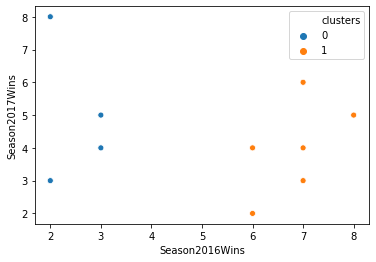

In [632]:
X = football_df.values[:, 1:]
kmeansWithMultipleMetrics(football_df, X, [[4,6], [5,4]],metric=0)

-----------------------------------------------------------------------------------------------------------------

Que: - Initialize with two centroids, (4, 6) and (5, 4). Use Euclidean distance as the distance metric. Please use K-Means to find two clusters.

Iteration 0
Current Cluster SSE= 57
Previous Cluster SSE= None
--------------------------------------------------------------------------------
Iteration 1
Current Cluster SSE= 43.96875
Previous Cluster SSE= 57
--------------------------------------------------------------------------------
Iteration 2
Current Cluster SSE= 27.833333333333332
Previous Cluster SSE= 43.96875
--------------------------------------------------------------------------------
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Number of Iterations= 3
Final Sum of Square Error= 27.833333333333332
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-


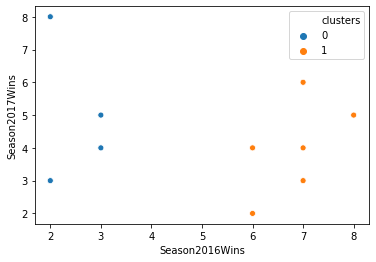

In [633]:
kmeansWithMultipleMetrics(football_df, X, [[4,6], [5,4]], metric=1)

-----------------------------------------------------------------------------------------------------------------

Que: - Initialize with two centroids, (3, 3) and (8, 3). Use Manhattan distance as the distance metric. Please use K-Means to find two clusters.

Iteration 0
Current Cluster SSE= 59
Previous Cluster SSE= None
--------------------------------------------------------------------------------
Iteration 1
Current Cluster SSE= 29.0
Previous Cluster SSE= 59
--------------------------------------------------------------------------------
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Number of Iterations= 2
Final Sum of Square Error= 29.0
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-


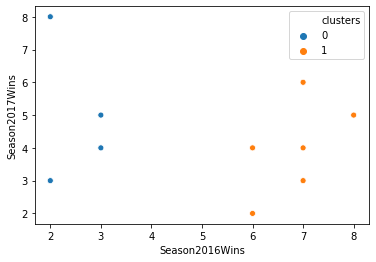

In [634]:
kmeansWithMultipleMetrics(football_df, X, [[3,3], [8,3]],metric=0)

-----------------------------------------------------------------------------------------------------------------

Que: - Initialize with two centroids, (3, 2) and (4, 8). Use Manhattan distance as the distance metric. Please use K-Means to find two clusters.

Iteration 0
Current Cluster SSE= 116
Previous Cluster SSE= None
--------------------------------------------------------------------------------
Iteration 1
Current Cluster SSE= 74.0
Previous Cluster SSE= 116
--------------------------------------------------------------------------------
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Number of Iterations= 2
Final Sum of Square Error= 74.0
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-


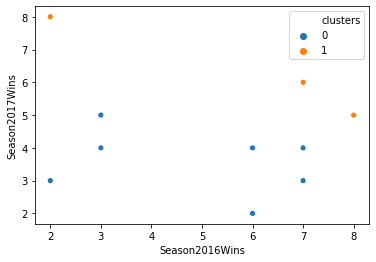

In [635]:
kmeansWithMultipleMetrics(football_df, X, [[3,2], [4,8]])

-----------------------------------------------------------------------------------------------------------------

In [636]:
colName=['sepal_length','sepal_width','petal_length','petal_width','class']
irisDataset=pd.read_csv("irisD.data",names=colName)

In [637]:
irisDataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [638]:
irisFeatures=irisDataset.iloc[:,:-1].values 
irisGroundTruths=irisDataset.iloc[:,4].values 

In [639]:
irisFeatures

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [640]:
labelEncoder=LabelEncoder()
irisGroundTruths=labelEncoder.fit_transform(irisGroundTruths)

In [641]:
irisGroundTruths

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Que: - Run K-means clustering with Euclidean, Cosine and Jarcard similarity. Specify K= the number of categorical values of y (the variable of label). Compare the SSEs of Euclidean-K- means Cosine-K-means, Jarcard-K-means. Which method is better and why?

## Euclidean Distance

In [642]:
euclideanDistanceClusters = kmeans(irisFeatures, None, k=3, metric=1)
euclideanDistanceClusters

Iteration 0
Current Cluster SSE= 162.21
Previous Cluster SSE= None
--------------------------------------------------------------------------------
Iteration 1
Current Cluster SSE= 91.74345963435378
Previous Cluster SSE= 162.21
--------------------------------------------------------------------------------
Iteration 2
Current Cluster SSE= 83.02104835746147
Previous Cluster SSE= 91.74345963435378
--------------------------------------------------------------------------------
Iteration 3
Current Cluster SSE= 79.61572102298426
Previous Cluster SSE= 83.02104835746147
--------------------------------------------------------------------------------
Iteration 4
Current Cluster SSE= 79.01204896074461
Previous Cluster SSE= 79.61572102298426
--------------------------------------------------------------------------------
Iteration 5
Current Cluster SSE= 78.85144142614601
Previous Cluster SSE= 79.01204896074461
--------------------------------------------------------------------------------
-+-

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Cosine Similarity 

In [643]:
cosineSimilarityClusters = kmeans(irisFeatures, None, k=3, metric=2)
cosineSimilarityClusters

Iteration 0
Current Cluster SSE= 252.45000000000007
Previous Cluster SSE= None
--------------------------------------------------------------------------------
Iteration 1
Current Cluster SSE= 109.36686658944242
Previous Cluster SSE= 252.45000000000007
--------------------------------------------------------------------------------
Iteration 2
Current Cluster SSE= 101.13367336186019
Previous Cluster SSE= 109.36686658944242
--------------------------------------------------------------------------------
Iteration 3
Current Cluster SSE= 92.93030809618764
Previous Cluster SSE= 101.13367336186019
--------------------------------------------------------------------------------
Iteration 4
Current Cluster SSE= 91.98930917874395
Previous Cluster SSE= 92.93030809618764
--------------------------------------------------------------------------------
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Number of Iterations= 5
Final Sum of Square Error= 91.98930917874395
-+--+--+--+--+--+

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Jaccard Similarity

In [644]:
jaccardSimilarityClusters = kmeans(irisFeatures, None, k=3, metric=3)
jaccardSimilarityClusters

Iteration 0
Current Cluster SSE= 166.01
Previous Cluster SSE= None
--------------------------------------------------------------------------------
Iteration 1
Current Cluster SSE= 86.32123489331185
Previous Cluster SSE= 166.01
--------------------------------------------------------------------------------
Iteration 2
Current Cluster SSE= 79.39432885317473
Previous Cluster SSE= 86.32123489331185
--------------------------------------------------------------------------------
Iteration 3
Current Cluster SSE= 79.16344154984179
Previous Cluster SSE= 79.39432885317473
--------------------------------------------------------------------------------
Iteration 4
Current Cluster SSE= 79.09734974533107
Previous Cluster SSE= 79.16344154984179
--------------------------------------------------------------------------------
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Number of Iterations= 5
Final Sum of Square Error= 79.09734974533107
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<b>Ans: - </b><br>
Sum of Square Errors: -
1. Euclidean Distance = 78.85144142614601
2. Cosine Similarity = 91.98930917874395
3. Jaccard Similarity = 79.09734974533107

-----------------------------------------------------------------------------------------------------------------

Que: - Comparethe accuracies of Euclidean-K-means Cosine-K-means, Jarcard-K-means. First, label each cluster with thelabel ofthe highestvotes. Later, compute the accuracy of the K-means with respect to the three similarity metrics.Which metric is better and why?

In [645]:
for clusters, method in zip((euclidean_clusters, cosine_clusters, jaccard_clusters), ('Euclidean Distance', 'Cosine Similarity', 'Jaccard Similarity')):
    acc = accuracy_score(irisGroundTruths, predictClass(clusters, irisGroundTruths,k=3))
    print('Accuracy of {} Metric= {:.2f}'.format(method, acc))

Accuracy of Euclidean Distance Metric= 0.89
Accuracy of Cosine Similarity Metric= 0.97
Accuracy of Jaccard Similarity Metric= 0.88


As per above observation we can see Cosine Similarity Metric has 0.97 accuracy. <br>
Cosine looks at the <b>angle</b> between vectors it does not consider their weight or magnitude. Euclidean distance is similar to using a <b>ruler</b> to actually measure the distance.

-----------------------------------------------------------------------------------------------------------------

Que: - Which of Euclidean-K-means, Cosine-K-means, Jarcard-K-means requires more iterations and times and why?

<b>Ans: -</b><br>
From above obeservations Euclidean-K-Means takes more iterations than cosine and jaccard. Because it checks for more centroids than cosine and jaccard. As for each iteration cluster centroid updated and checked for the cluster points. It can't handle outliers well thus it takes time to calculate the distance. Outliers should be excluded from the dataset.

-----------------------------------------------------------------------------------------------------------------

Que: - Compare the SSEs of Euclidean-K-means Cosine-K-means, Jarcard-K-means with respect to the following three terminating conditions: 
1. when there is no change in centroid position 
2. when the SSE value increases in the next iteration 
3. when the maximum preset value (100) of iteration is complete 
<br>Which method requires more time or more iterations and why?

In [646]:
sameCentroidEuclidean = kmeans(irisFeatures, [[6.3, 2.5, 5. , 1.9],[4.9, 3. , 1.4, 0.2],[5.4, 3. , 4.5, 1.5]], k=3, metric=1)
sameCentroidEuclidean

Iteration 0
Current Cluster SSE= 137.5
Previous Cluster SSE= None
--------------------------------------------------------------------------------
Iteration 1
Current Cluster SSE= 84.7045391377853
Previous Cluster SSE= 137.5
--------------------------------------------------------------------------------
Iteration 2
Current Cluster SSE= 83.81507868073713
Previous Cluster SSE= 84.7045391377853
--------------------------------------------------------------------------------
Iteration 3
Current Cluster SSE= 83.04698186876976
Previous Cluster SSE= 83.81507868073713
--------------------------------------------------------------------------------
Iteration 4
Current Cluster SSE= 81.74960206772623
Previous Cluster SSE= 83.04698186876976
--------------------------------------------------------------------------------
Iteration 5
Current Cluster SSE= 80.80637600000003
Previous Cluster SSE= 81.74960206772623
--------------------------------------------------------------------------------
Iterati

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [647]:
sameCentroidCosine = kmeans(irisFeatures, [[6.3, 2.5, 5. , 1.9],[4.9, 3. , 1.4, 0.2],[5.4, 3. , 4.5, 1.5]], k=3, metric=2)
sameCentroidCosine

Iteration 0
Current Cluster SSE= 176.71999999999997
Previous Cluster SSE= None
--------------------------------------------------------------------------------
Iteration 1
Current Cluster SSE= 119.32111604641861
Previous Cluster SSE= 176.71999999999997
--------------------------------------------------------------------------------
Iteration 2
Current Cluster SSE= 93.0971863464874
Previous Cluster SSE= 119.32111604641861
--------------------------------------------------------------------------------
Iteration 3
Current Cluster SSE= 92.11861836952653
Previous Cluster SSE= 93.0971863464874
--------------------------------------------------------------------------------
Iteration 4
Current Cluster SSE= 91.98930917874395
Previous Cluster SSE= 92.11861836952653
--------------------------------------------------------------------------------
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Number of Iterations= 5
Final Sum of Square Error= 91.98930917874395
-+--+--+--+--+--+--+-

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [648]:
sameCentroidJaccard = kmeans(irisFeatures, [[6.3, 2.5, 5. , 1.9],[4.9, 3. , 1.4, 0.2],[5.4, 3. , 4.5, 1.5]], k=3, metric=3)
sameCentroidJaccard

Iteration 0
Current Cluster SSE= 142.44
Previous Cluster SSE= None
--------------------------------------------------------------------------------
Iteration 1
Current Cluster SSE= 84.0105033701264
Previous Cluster SSE= 142.44
--------------------------------------------------------------------------------
Iteration 2
Current Cluster SSE= 84.94117523140844
Previous Cluster SSE= 84.0105033701264
--------------------------------------------------------------------------------
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-
Number of Iterations= 3
Final Sum of Square Error= 84.0105033701264
-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<b>Ans: -</b><br>
From above obeservations Euclidean-K-Means takes more iterations than cosine and jaccard. Because it checks for more centroids than cosine and jaccard. As for each iteration cluster centroid updated and checked for the cluster points. It can't handle outliers well thus it takes time to calculate the distance. Outliers should be excluded from the dataset.

-----------------------------------------------------------------------------------------------------------------

Que: - List the general idea of K-means clustering algorithm? 

<b>Ans: -</b> <br>
Step 1: - K initial "means" or centroids are randomly generated within the data domain.<br>
Step 2: - Clusters are created by associating every observation with the nearest mean. <br>
Step 3: - New centroids are calculated for the clusters. <br>
Step 4: - Steps 2 and 3 are repeated until desired result has been recieved.

-----------------------------------------------------------------------------------------------------------------

Que: - Please give a scenario in which K-means cluster may not work very well? 

<b>Ans: -</b><br>
When you have a noisy dataset, i.e., outliners in your dataset. It may create another cluster for itself, or it will be added to another cluster. Which can make predict wrong outputs. Thus removing this outliners is important.

-----------------------------------------------------------------------------------------------------------------

Que: - What is the advantage of K-Means? What are the disadvantages of K-Means?

<b>Ans: -</b><br>
Advantages: -<br>
1. K - means is easy to implement.
2. Scalable to large data sets.
3. Easily adapts to new examples.
4. Generalizes to clusters of different shapes and sizes.

Disadvantages: -<br>
1. Choosing k value manually is difficult.
2. When clusters have varying sizes and density then k-means performs poorly.
3. Noisy data (Outliners in dataset).


-----------------------------------------------------------------------------------------------------------------

Que: - The classic K-means algorithm randomly initializes K centers. Is there any better strategy for selecting K initial centers?

<b>Ans: - </b><br>
Silhouette score: - It checks how well an observation is clustered and it calculates the average distance between clusters. It wants to find the optimal number of clusters that produce a subdivision of the dataset to dense blocks that are well separated from each other.